### Importing Libraries

In [1]:
import pandas as pd
import sklearn
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#reading the test data
df_test= pd.read_csv('test.csv')

In [3]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
#Reading the train data
df_train= pd.read_csv('train.csv')

In [5]:
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,ad227d7d69af545e,"==Wikipedia:Wikifun== \n\n Hi, I've noticed yo..."
freq,1,1


In [8]:
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [10]:
#Visualizing the data set

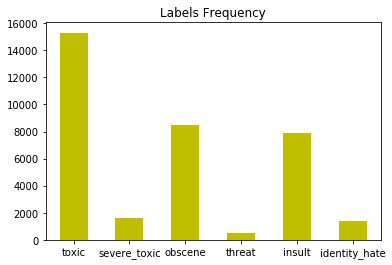

In [11]:
train_labels = df_train[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

label_count.plot(kind='bar', title='Labels Frequency',rot=0, color='y')

This shows that the number of comments in each category is extremely unbalanced. We can further check whether each comment has been tagged or not?

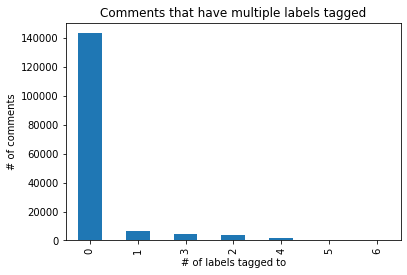

89.83211235124176 % comments have no labels associated to them.


In [12]:
rowsums = df_train.iloc[:,2:8].sum(axis=1)
valcount = rowsums.value_counts()
valcount.plot.bar()
plt.xlabel("# of labels tagged to")
plt.ylabel("# of comments")
plt.title("Comments that have multiple labels tagged")
plt.show()

print(valcount[0]*100/sum(valcount),"% comments have no labels associated to them.")

In [13]:
df_train.comment_text.shape

(159571,)

In [14]:
df_test.comment_text.shape

(153164,)

In [15]:
print(df_train.comment_text[9])
print(df_test.comment_text[9])

alignment on this subject and which are contrary to those of DuLithgow
== Double Redirects == 

 When fixing double redirects, don't just blank the outer one, you need edit it to point it to the final target, unless you think it's inappropriate, in which case, it needs to be nominated at WP:RfD


### Data Preprocessing

In [16]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
wordnet=WordNetLemmatizer()

corpus = []
for i in range(0, len(df_train['comment_text'])):
    review = re.sub('[^a-zA-Z]', ' ', df_train['comment_text'][i])
    review = review.lower()
    review = review.split()
    
    review =[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[9]

'alignment subject contrary dulithgow'

In [18]:
def preprocess_text(text):
    text = text.lower()
    text = text.split()
    text =[wordnet.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    
    return ''.join(text)
    

In [19]:
df_test['comment_text'] = df_test['comment_text'].apply(preprocess_text)

In [20]:
df_train['comment_text']=corpus

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [90]:
# spliting into traindata and testdata 
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train, test = train_test_split(df_train, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(106912,)
(52659,)


## Multinomial NB

In [24]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_train & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))


... Processing toxic
Test accuracy is 0.9210961089272489
... Processing severe_toxic
Test accuracy is 0.9900112041626312
... Processing obscene
Test accuracy is 0.9519930116409351
... Processing threat
Test accuracy is 0.9971135038644866
... Processing insult
Test accuracy is 0.9519550314286257
... Processing identity_hate
Test accuracy is 0.9910556600011394


## LinearSVC

In [25]:
from sklearn.svm import LinearSVC

In [26]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_train & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing toxic
Test accuracy is 0.9598169353766688
... Processing severe_toxic
Test accuracy is 0.990770808408819
... Processing obscene
Test accuracy is 0.978693100894434
... Processing threat
Test accuracy is 0.9974933059875805
... Processing insult
Test accuracy is 0.9708691771587004
... Processing identity_hate
Test accuracy is 0.9923279971135038


## XGBoost 

In [27]:
from xgboost.sklearn import XGBClassifier

In [28]:
xg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(XGBClassifier(random_state=42))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_train & y
    xg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = xg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))


... Processing toxic
Test accuracy is 0.9551833494749236
... Processing severe_toxic
Test accuracy is 0.9902390854364876
... Processing obscene
Test accuracy is 0.9783512789836495
... Processing threat
Test accuracy is 0.9972654247137241
... Processing insult
Test accuracy is 0.9703564442925235
... Processing identity_hate
Test accuracy is 0.9922900169011944


## LSTM Model

Multi-lable Text Classification Model with Single Output Layer

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.3.1'

In [109]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.preprocessing.text import Tokenizer

In [106]:
x=df_train['comment_text'] 
x.shape


(159571,)

In [96]:
y=train_labels.values 
y.shape

(159571, 6)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [124]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [125]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 40)           400000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 457,006
Trainable params: 457,006
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
1995/1995 [==============================] - 265s 133ms/step - loss: 0.1350 - accuracy: 0.9842 - val_loss: 0.1212 - val_accuracy: 0.9941
Epoch 2/5
1995/1995 [==============================] - 259s 130ms/step - loss: 0.1201 - accuracy: 0.9934 - val_loss: 0.1205 - val_accuracy: 0.9912
Epoch 3/5
1995/1995 [==============================] - 261s 131ms/step - loss: 0.1176 - accuracy: 0.9852 - val_loss: 0.1177 - val_accuracy: 0.9779
Epoch 4/5
1995/1995 [==============================] - 261s 131ms/step - loss: 0.1090 - accuracy: 0.9879 - val_loss: 0.0798 - val_accuracy: 0.9940
Epoch 5/5
1995/1995 [==============================] - 261s 131ms/step - loss: 0.0589 - accuracy: 0.9900 - val_loss: 0.0532 - val_accuracy: 0.9940


In [127]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

998/998 [==============================] - 24s 24ms/step - loss: 0.0532 - accuracy: 0.9940
Test Score: 0.0532132163643837
Test Accuracy: 0.9939526915550232
